In [1]:
from pyforest import *
lazy_imports()

['import altair as alt',
 'import keras',
 'import seaborn as sns',
 'import statistics',
 'from sklearn.preprocessing import StandardScaler',
 'import sys',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.linear_model import LassoCV',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import re',
 'import pydot',
 'import plotly.express as px',
 'from sklearn.model_selection import cross_val_score',
 'from dask import dataframe as dd',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import imutils',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.preprocessing import MinMaxScaler',
 'from pyspark import SparkContext',
 'import matplotlib as mpl',
 'from pathlib import Path',
 'import awswrangler as wr',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.feature_

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('bigmart_train.csv')
test_data = pd.read_csv('bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Exploratory Data Analysis

In [6]:
print('Train data: ', train_data.shape)
print('Test data: ', test_data.shape)

Train data:  (8523, 12)
Test data:  (5681, 11)


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train_data['source'] = 'train'
test_data['source'] = 'test'
df = pd.concat([train_data,test_data],ignore_index = True)

<IPython.core.display.Javascript object>

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

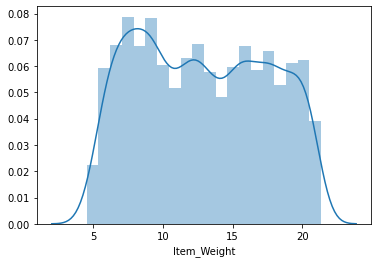

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

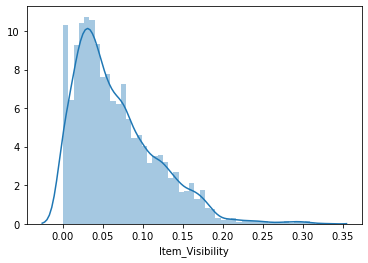

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

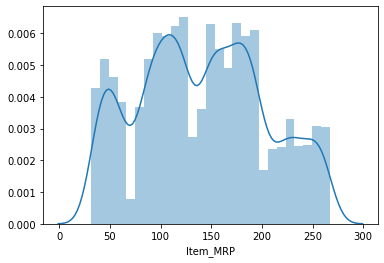

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

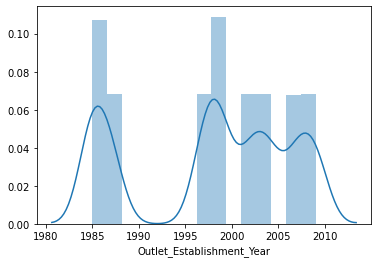

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

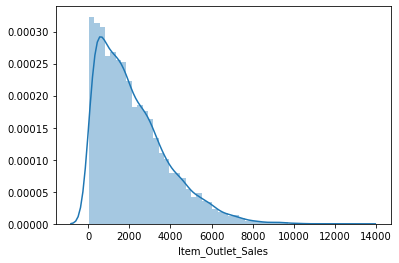

In [14]:
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

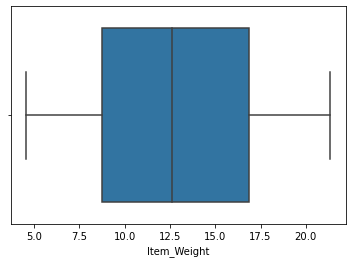

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

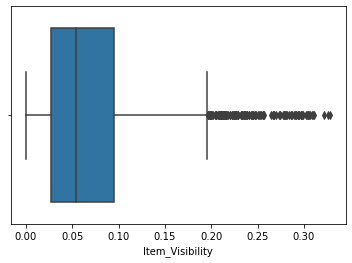

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

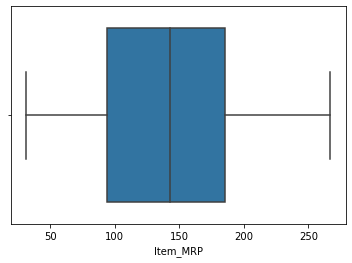

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

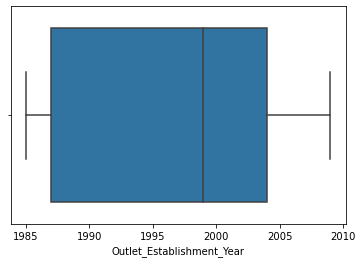

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

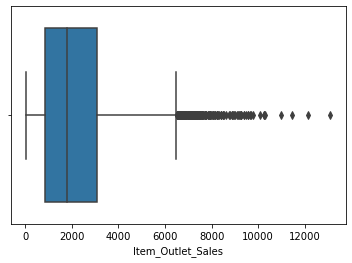

In [15]:
for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

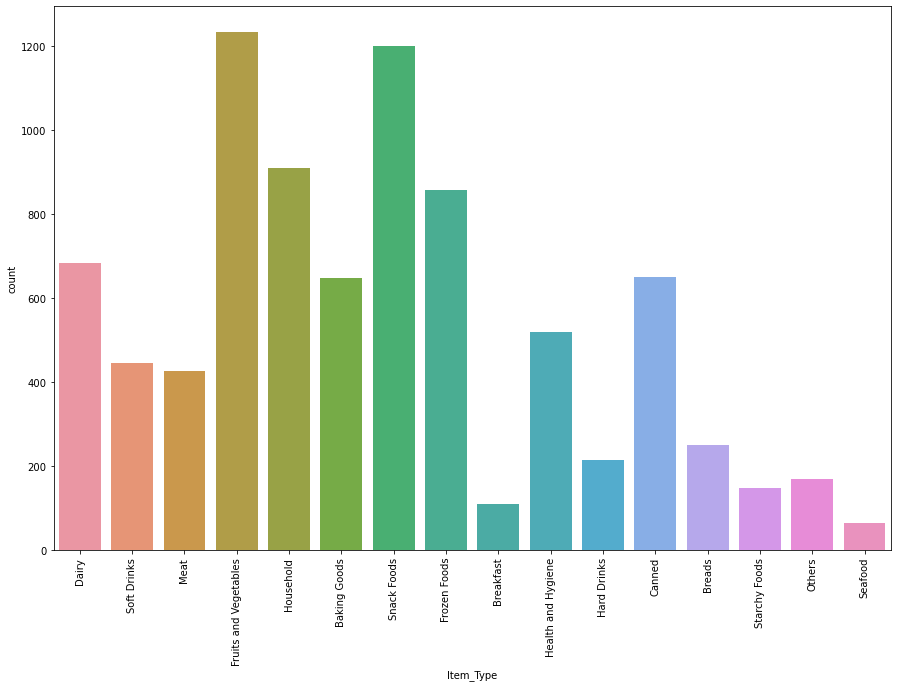

In [16]:
plt.figure(figsize = (15,10))
sns.countplot(train_data.Item_Type)
plt.xticks(rotation = 90)

In [17]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Distribution of Outlet size 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

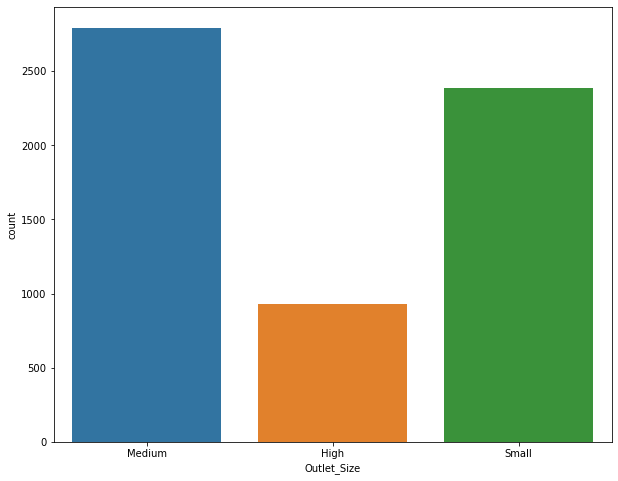

In [18]:
plt.figure(figsize = (10,8))
sns.countplot(train_data.Outlet_Size)

In [19]:
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### Distribution of the Outlet_Location_Type 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

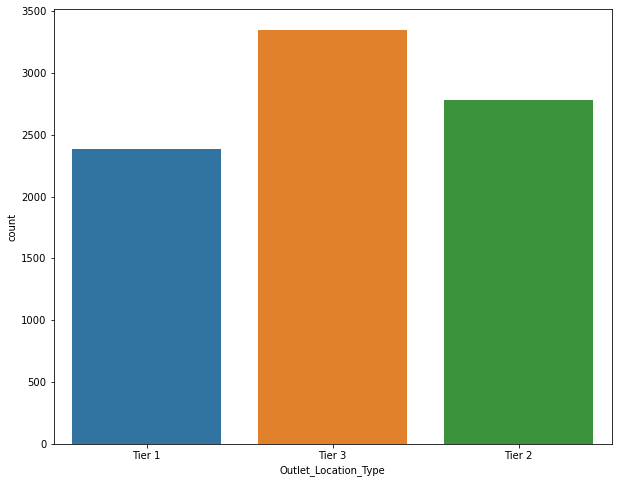

In [20]:
plt.figure(figsize = (10,8))
sns.countplot(train_data.Outlet_Location_Type)

In [21]:
train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

### Distribution of the Outlet_type 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

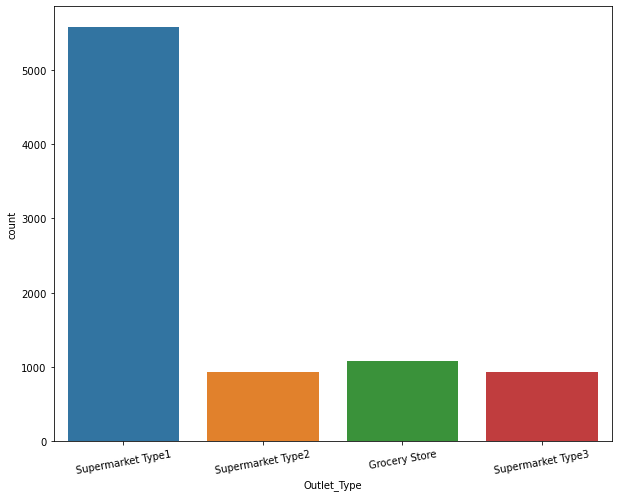

In [22]:
plt.figure(figsize = (10,8))
sns.countplot(train_data.Outlet_Type)
plt.xticks(rotation = 10)

In [23]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Item_weight and Item_Outlet_Sales Anaysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

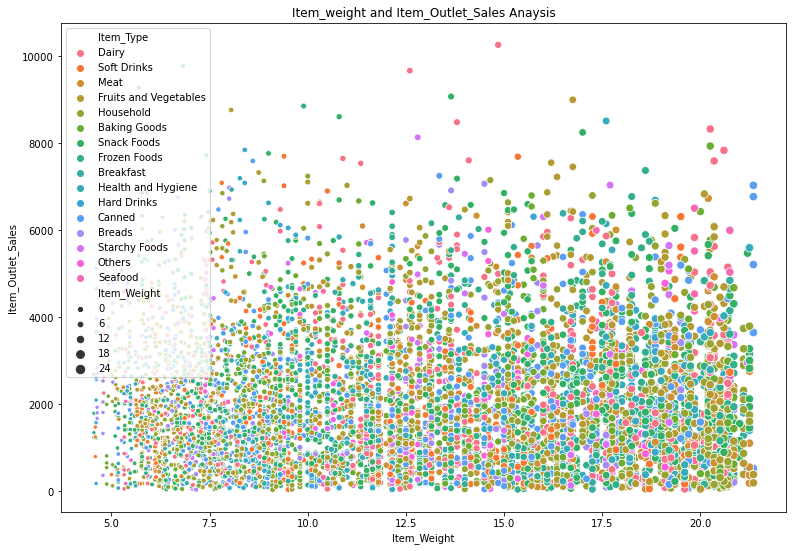

In [24]:
plt.figure(figsize = (13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_weight and Item_Outlet_Sales Anaysis')
sns.scatterplot(x = 'Item_Weight' , y = 'Item_Outlet_Sales',hue = 'Item_Type',size = 'Item_Weight',data = train_data)

### Item_Visibility and Maximum Retail Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

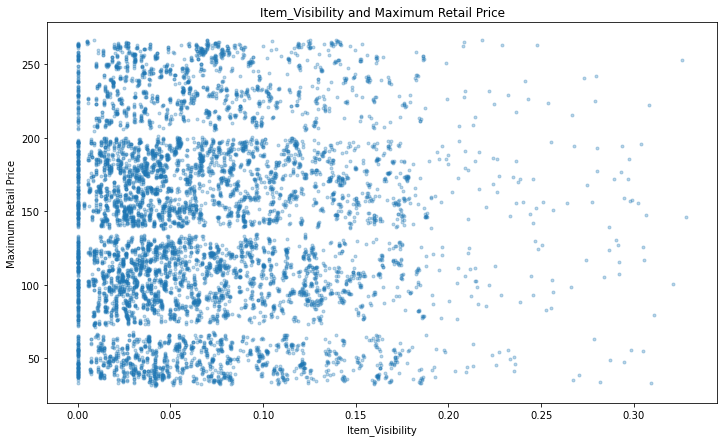

In [25]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(train_data.Item_Visibility, train_data.Item_MRP, ".",alpha = 0.3)

### Impact of Outlet_Type on Item_Outlet_Sales

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

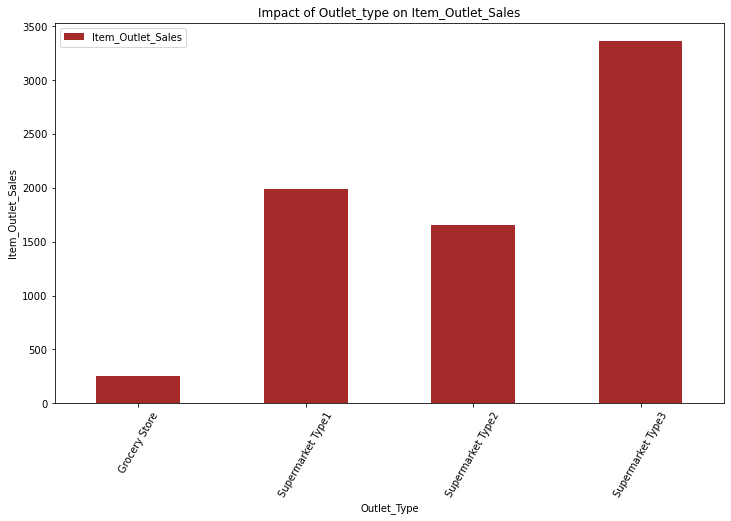

In [26]:
Item_Type_pivot = train_data.pivot_table(index = 'Outlet_Type', values = "Item_Outlet_Sales",aggfunc = np.median)

Item_Type_pivot.plot(kind = 'bar' , color = 'brown' , figsize = (12,7))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_type on Item_Outlet_Sales')
plt.xticks(rotation = 60)
plt.show()

### Impact of Item_Fat_Content on Item_Outlet_Sales 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

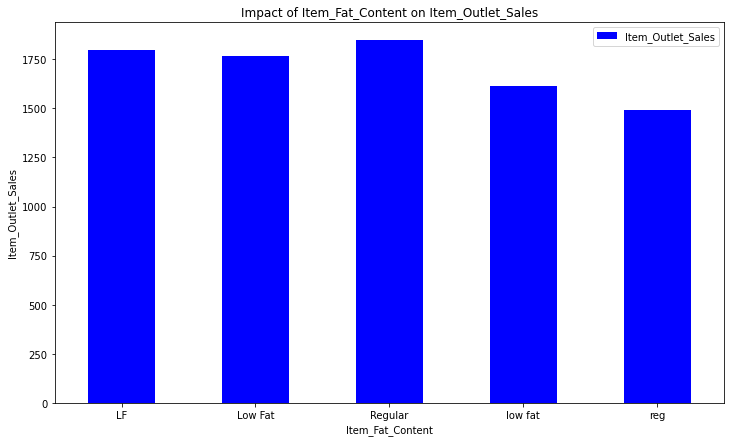

In [27]:
Item_Type_pivot = train_data.pivot_table(index = 'Item_Fat_Content', values = "Item_Outlet_Sales",aggfunc = np.median)

Item_Type_pivot.plot(kind = 'bar' , color = 'blue' , figsize = (12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation = 0)
plt.show()

In [28]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [29]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [30]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [31]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

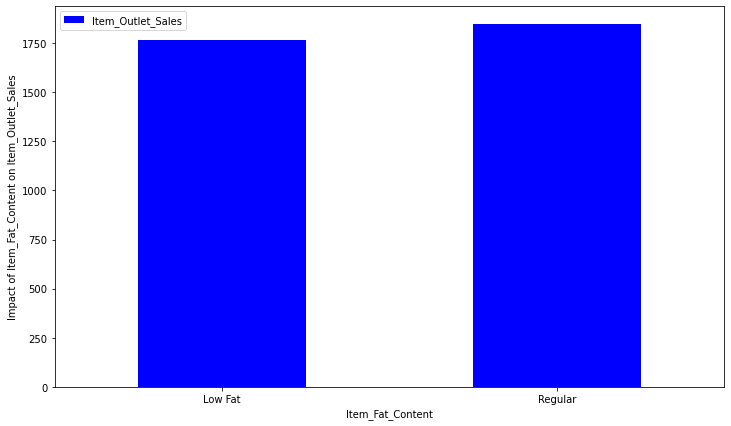

In [32]:
Item_Fat_content_pivot = train_data.pivot_table(index = 'Item_Fat_Content' , values = 'Item_Outlet_Sales',aggfunc = np.median)

Item_Fat_content_pivot.plot(kind = 'bar',color = 'blue',figsize = (12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation = 0)
plt.show()

In [33]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


### Correlation between different attributes

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

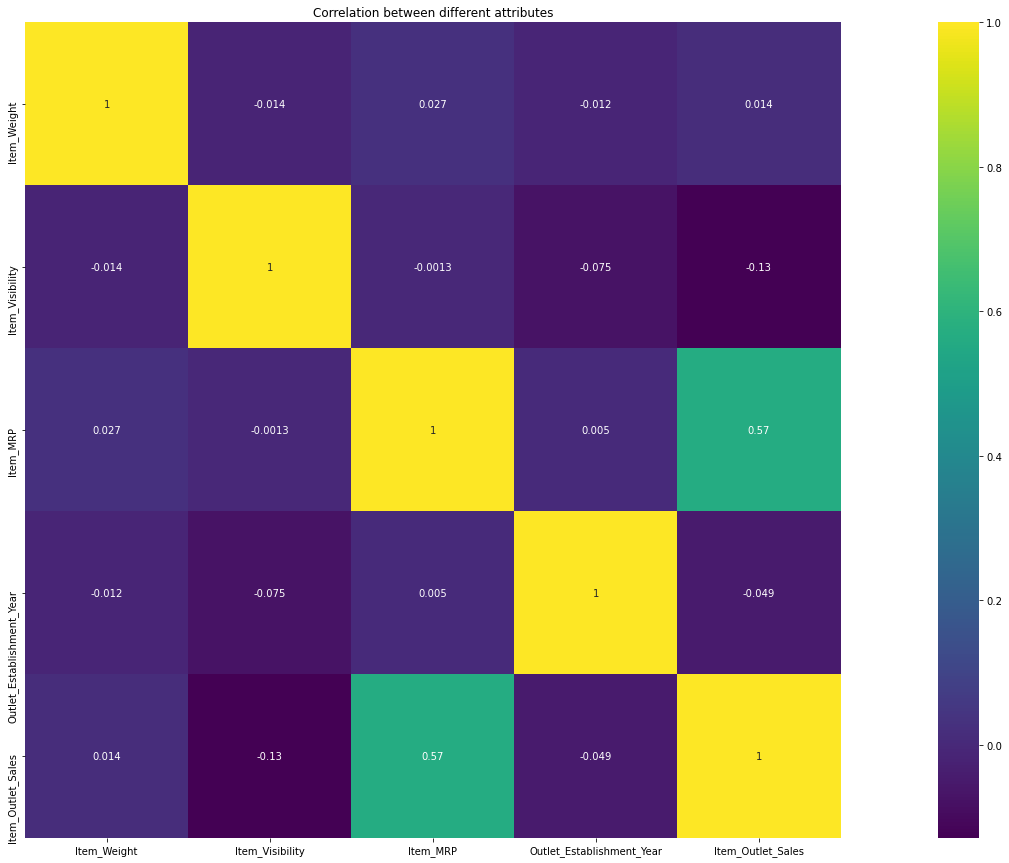

In [34]:
plt.figure(figsize=(35,15))
sns.heatmap(train_data.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

# Feature Engineering ,Selection and Transformation

## Treating the missing values 

### Item Weight 

In [35]:
#Nomral Distribution can be seen in boxplot so we took mean
df['Item_Weight'].mean()

12.792854228644284

In [36]:
df['Item_Weight'].fillna(df['Item_Weight'].mean() , inplace = True)

### Outlet Size 

In [37]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [38]:
df['Outlet_Size'].fillna('Medium' , inplace = True)

In [39]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Item_Visibility 

In [40]:
# In  the boxplot, we saw Item_Visibility was right skewed so for that reason we are using ,median
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [41]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

### Outlet Years

In [42]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [43]:
#To find total establishment year of all the outlet
# We took 2009 cuz latest year of establishment was 2009
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

### Item Type

In [44]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [45]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [46]:
# FD is food items , NC is non consumble , Dr is drinks 

In [47]:
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x:x[0:2])
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumble','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food             10201
Non-Consumble     2686
Drinks            1317
Name: New_Item_type, dtype: int64

If a product is non-consumable then why associate a fat-content to them? We will get rid of this.

In [48]:
df.loc[df['New_Item_type']=='Non-Consumble','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [49]:
item_visib_avg = df.pivot_table(values = 'Item_Visibility',index = 'Item_Identifier')

In [50]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [51]:
function  = lambda x:x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [52]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumble,0.000000


In [53]:
df.shape

(14204, 16)

## Dealing with Categorical Variables 

### Label Encoder

In [54]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [55]:
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type', 'Outlet']
for i in varib:
    df[i] = label.fit_transform(df[i])

In [56]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1


In [57]:
df = pd.get_dummies(df,columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type', 'Outlet'] )
df.dtypes

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0


## Model Building  

In [59]:
 df.drop(['Item_Type','Outlet_Establishment_Year'],axis = 1 , inplace = True)

In [60]:
train = df.loc[df['source']=='train']
test = df.loc[df['source']=='test']

In [61]:
train.drop(['source'],axis =1,inplace = True)

In [62]:
test.drop(['Item_Outlet_Sales','source'],axis = 1 ,inplace = True)

In [63]:
x_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis =1 )
y_train = train['Item_Outlet_Sales']
x_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis =1).copy()

### Linear Regression 

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize =True)
lr.fit(x_train ,y_train)

LinearRegression(normalize=True)

In [65]:
lr_pred = lr.predict(x_test)

In [66]:
lr_pred

array([1836., 1588., 1872., ..., 1812., 3600., 1280.])

In [67]:
lr_accuracy = round(lr.score(x_train,y_train)*100)

In [68]:
lr_accuracy

56

### DecisionTreeRegressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

tree.fit(x_train,y_train)
tree_pred = tree.predict(x_test)

In [70]:
tree_pred

array([1649.67954808, 1412.15620504,  584.75776477, ..., 1827.83284545,
       3692.81910244, 1211.249992  ])

In [71]:
tree_accuracy = round(tree.score(x_train,y_train)*100)
tree_accuracy

62

###  RandomForestRegressor

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)

rf.fit(x_train,y_train)

rf_accuracy = round(rf.score(x_train,y_train)*100)

rf_accuracy

61

In [73]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [74]:
y_pred = model.predict(x_test)
y_pred

array([1659.6506, 1297.625 ,  639.7941, ..., 1862.8121, 3716.712 ,
       1274.1649], dtype=float32)

In [75]:
model.score(x_train, y_train)*100

67.72716943174717